## 📝 Notebook Imports and Packages

In [2]:
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

### 🔹 Example 1 - A simple cost function

## $$f(x) = x^2 + x + 1$$

In [3]:
def f(x):
    return x**2 + x + 1

#### Make data with Numpy:
`numpy.linspace(start, stop, num=50, endpoint=True, retstep=False, dtype=None, axis=0)[source]`

Return **evenly** spaced numbers over a specified interval.

Returns num evenly spaced samples, calculated over the interval \[start, stop\].

The endpoint of the interval can optionally be excluded.

In [4]:
x_1 = np.linspace(start=-3, stop=3, num=500)

print(f"First ten elements:\n{x_1[:10]}\nTOTAL: {len(x_1)}")
print(type(x_1))

First ten elements:
[-3.         -2.98797595 -2.9759519  -2.96392786 -2.95190381 -2.93987976
 -2.92785571 -2.91583166 -2.90380762 -2.89178357]
TOTAL: 500
<class 'numpy.ndarray'>


#### Ploting the data with matplotlib

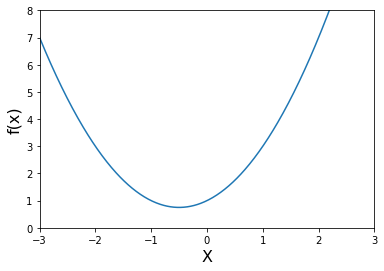

In [5]:
plt.xlim([-3, 3])
plt.ylim(0, 8)

plt.xlabel('X', fontsize=16)
plt.ylabel('f(x)', fontsize=16)
plt.plot(x_1, f(x_1))
plt.show()

## Slope & Derivatives

If $f(x)$ is our cost,  then the lowest cost will be at the bottom of this graph. Now we have to find out what's the lowest cost and for what value of x is our cost the lowest. Going from 2 to zero, we see that the cost is decreasing, but as it gets closer to zero, the slope changes from almost vertical to horizontal, meaning that the cost is only *slightly* decreasing. After reaching the minimum, the cost starts to increase again.

The slope of a function is given by that functions derivative. Derivatives are how you calculate a function's rate of change at a given point. 

### Calculus Power Rule
A simple way to get the derivative is using the power rule:
# $$\frac {d}{dx}  x^n = n * x^{n-1}$$

**Examples:**

$\frac {d}{dx}  x^5 = 5 * x^{5-1}$

$\frac {d}{dx}  x^5 = 5x^4$


$\frac {d}{dx}[x^3 - 5x^2 + 7] = 3 * x^{3-1} + 5 * (2 * x^{2-1})$

$\frac {d}{dx}[x^3 - 5x^2 + 7] = 3x^2 + 10x$


$f(x)$
$ \frac {d}{dx}[x^2 + x + 1] = 2 * x^{2-1} + 1 * x^{1-1}$

In [9]:
# Get the slope of the function
def df(x):
    return 2 * x + 1
    

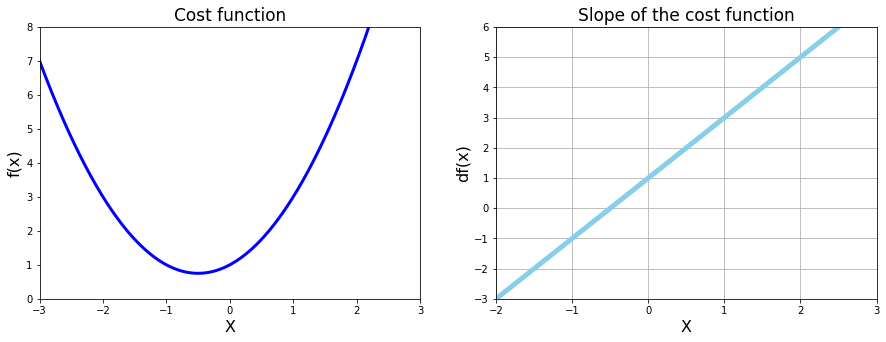

In [7]:
# Plot function and derivative side by side

plt.figure(figsize=[15,5])

# Subplot display graphs side by side 

# Chart 1: Cost function 
# Side by side: (n rows=1, n columns=2, index position = 1)
# Vertically stacked: n rows = 2, n columns = 1, index position = 1
plt.subplot(1, 2, 1)

plt.xlim([-3, 3])
plt.ylim(0, 8)

plt.title("Cost function", fontsize=17)
plt.xlabel('X', fontsize=16)
plt.ylabel('f(x)', fontsize=16)
plt.plot(x_1, f(x_1), color="blue", linewidth=3)

# Chart 2: Derivative

plt.subplot(1, 2, 2)

plt.xlim([-2, 3])
plt.ylim(-3, 6)

plt.title("Slope of the cost function", fontsize=17)
plt.xlabel('X', fontsize=16)
plt.ylabel('df(x)', fontsize=16)

plt.grid()

plt.plot(x_1, df(x_1), color="skyblue", linewidth=5)

plt.show()

## Python Loops & Gradient Descent
* Starting point
* Learning rate
* Temporary value 

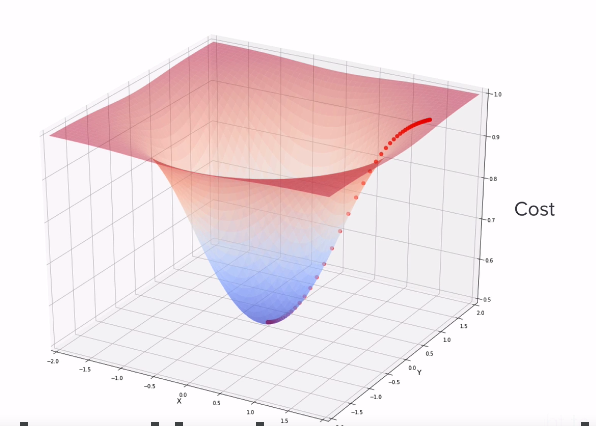

In [19]:
# Gradient
new_x = 3                    # Starting point
previous_x = 0           # Temp value
step_multiplier = 0.1    # Learning rate

for n in range(30):             # 30 is arbitrary
    previous_x = new_x          # new_x is a random guess to start
    gradient = df(previous_x)   # the value of the slope for the previous value of x
    # Learning step: we take a step that'd proportional to the negative of the gradient of the function 
    # at the point that we are at, and then we're subtracting from the previou x value because we want 
    # to move against the gradient towards the minimun
    new_x = previous_x - step_multiplier * gradient 

print(f"Local minimum occurs at: {new_x}")
print(f"Slope or df(x) value at this point is: {df(new_x)}")
print(f"f(x) value or cos at this point is: {f(new_x)}" )
    

Local minimum occurs at: -0.4956672098625011
Slope or df(x) value at this point is: 0.008665580274997753
f(x) value or cos at this point is: 0.7500187730703756


In [28]:
# Running again 500 times:
precision = 0.0001

new_x = -3                    
previous_x = 0          
step_multiplier = 0.1 

x_list = [new_x]
slope_list = [df(new_x)]

for n in range(500):             
    previous_x = new_x          
    gradient = df(previous_x)   
    new_x = previous_x - step_multiplier * gradient
    
    step_size = abs(new_x - previous_x)
    # The step size decreases each time the loop runs
    if step_size < precision:
        print(f"Loop ran this many times: {n}")
        break
        
    x_list.append(new_x)
    slope_list.append(df(new_x))

print(f"Local minimum occurs at: {new_x}")
print(f"Slope or df(x) value at this point is: {df(new_x)}")
print(f"f(x) value or cos at this point is: {f(new_x)}" )
    

Loop ran this many times: 40
Local minimum occurs at: -0.49962781616118024
Slope or df(x) value at this point is: 0.0007443676776395236
f(x) value or cos at this point is: 0.7500001385208099


In [29]:
print(x_list)
print(slope_list)

[3, 2.3, 1.7399999999999998, 1.2919999999999998, 0.9335999999999998, 0.6468799999999998, 0.41750399999999976, 0.2340031999999998, 0.08720255999999982, -0.03023795200000015, -0.12419036160000013, -0.1993522892800001, -0.25948183142400005, -0.30758546513920004, -0.34606837211136005, -0.376854697689088, -0.4014837581512704, -0.4211870065210163, -0.43694960521681303, -0.44955968417345044, -0.45964774733876035, -0.46771819787100827, -0.4741745582968066, -0.47933964663744527, -0.4834717173099562, -0.48677737384796493, -0.48942189907837197, -0.49153751926269756, -0.49323001541015804, -0.49458401232812643, -0.4956672098625011, -0.4965337678900009, -0.4972270143120007, -0.4977816114496006, -0.49822528915968045, -0.49858023132774437, -0.4988641850621955, -0.4990913480497564, -0.4992730784398051, -0.4994184627518441, -0.4995347702014753]
[7, 5.6, 4.4799999999999995, 3.5839999999999996, 2.8671999999999995, 2.29376, 1.8350079999999995, 1.4680063999999997, 1.1744051199999996, 0.9395240959999998, 0.7

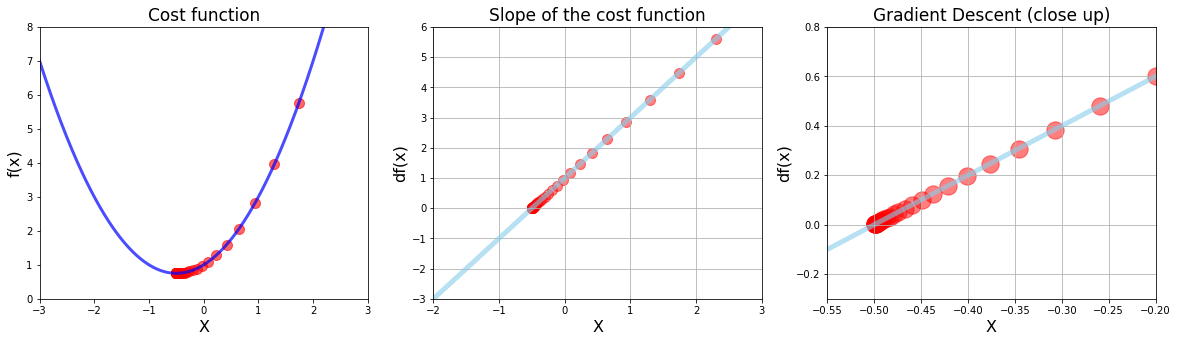

In [37]:
# Plot function and derivative side by side

plt.figure(figsize=[20,5])

# Subplot display graphs side by side 

# Chart 1: Cost function 
# Side by side: (n rows=1, n columns=2, index position = 1)
# Vertically stacked: n rows = 2, n columns = 1, index position = 1
plt.subplot(1, 3, 1)

plt.xlim([-3, 3])
plt.ylim(0, 8)

plt.title("Cost function", fontsize=17)
plt.xlabel('X', fontsize=16)
plt.ylabel('f(x)', fontsize=16)
plt.plot(x_1, f(x_1), color="blue", linewidth=3, alpha=0.7)

values = np.array(x_list)
plt.scatter(x_list, f(values), color='red', alpha=0.6, s=100)

# Chart 2: Derivative

plt.subplot(1, 3, 2)

plt.xlim([-2, 3])
plt.ylim(-3, 6)

plt.title("Slope of the cost function", fontsize=17)
plt.xlabel('X', fontsize=16)
plt.ylabel('df(x)', fontsize=16)

plt.grid()

plt.plot(x_1, df(x_1), color="skyblue", linewidth=5, alpha=0.6)
plt.scatter(x_list, slope_list, color='red', s=100, alpha=0.5)

# Chart 3: Derivative (Close up)

plt.subplot(1, 3, 3)

plt.title("Gradient Descent (close up)", fontsize=17)
plt.xlabel('X', fontsize=16)
plt.ylabel('df(x)', fontsize=16)
plt.xlim([-0.55, -0.2])
plt.ylim(-0.3, 0.8)

plt.grid()

plt.plot(x_1, df(x_1), color="skyblue", linewidth=5, alpha=0.6)
plt.scatter(x_list, slope_list, color='red', s=300, alpha=0.5)

plt.show()